# Import the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/91976/DataScience Projects/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
object_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'Churn']

for col in object_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [10]:
# Why is Total charges an object data type
# See non numeric values

non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(non_numeric[['TotalCharges']])

     TotalCharges
488              
753              
936              
1082             
1340             
3331             
3826             
4380             
5218             
6670             
6754             


In [11]:
# Strip Whitespace
df['TotalCharges'] = df['TotalCharges'].str.strip()

# Convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
missing_values = df[df['TotalCharges'].isna()]
missing_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [24]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [40]:
1869/5163

0.36199883788495063

In [33]:
count = len(df[(df['SeniorCitizen'] == 1) & (df['Churn'] == 'Yes')])
print(count)

476


# EDA

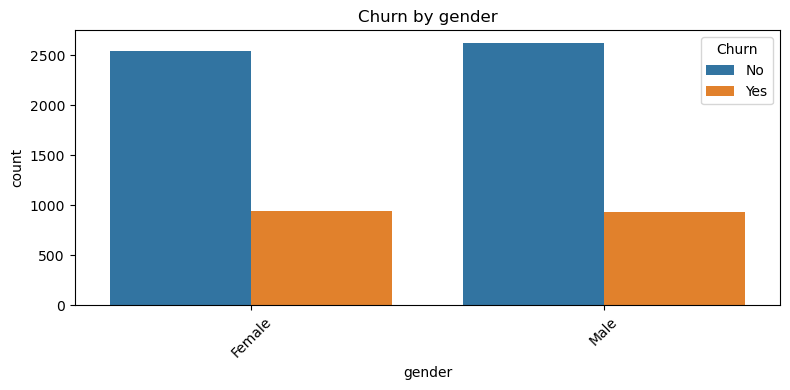

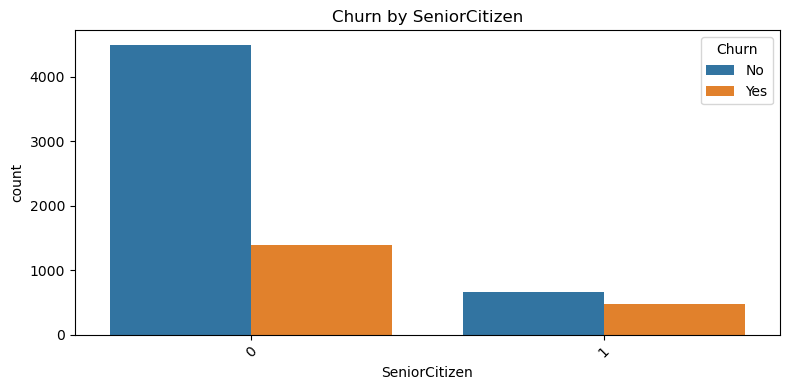

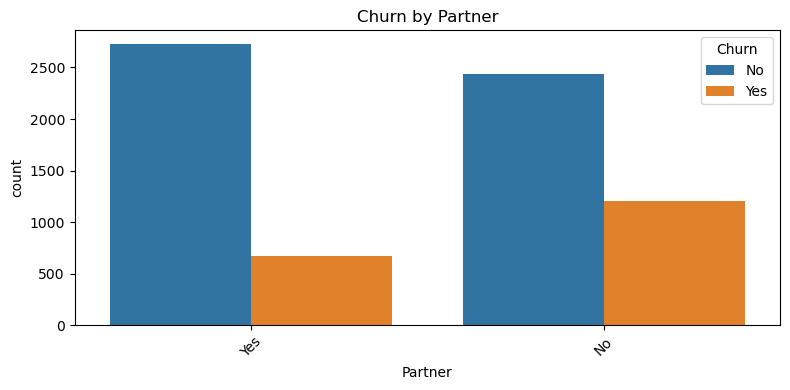

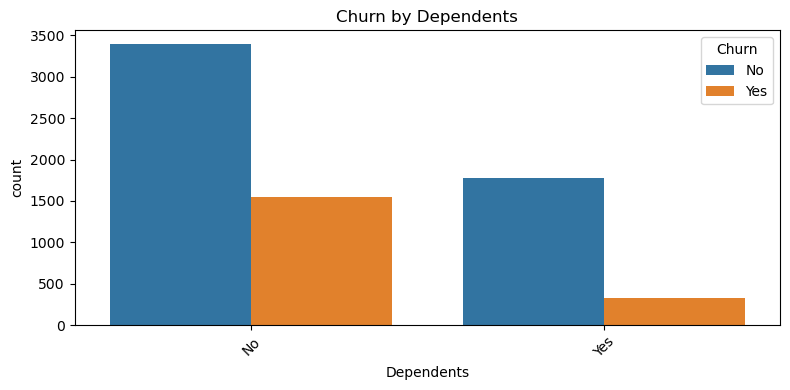

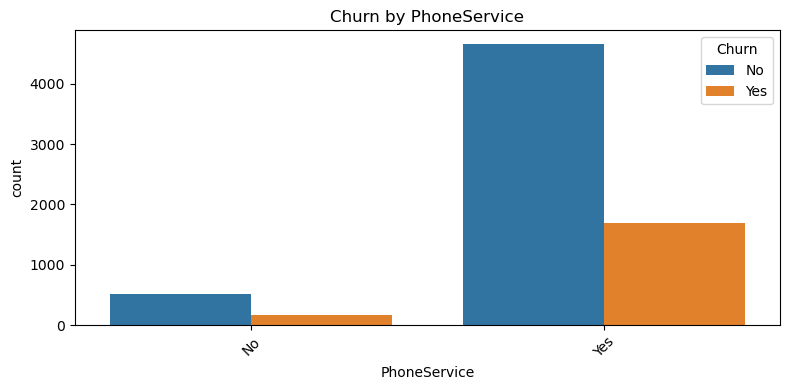

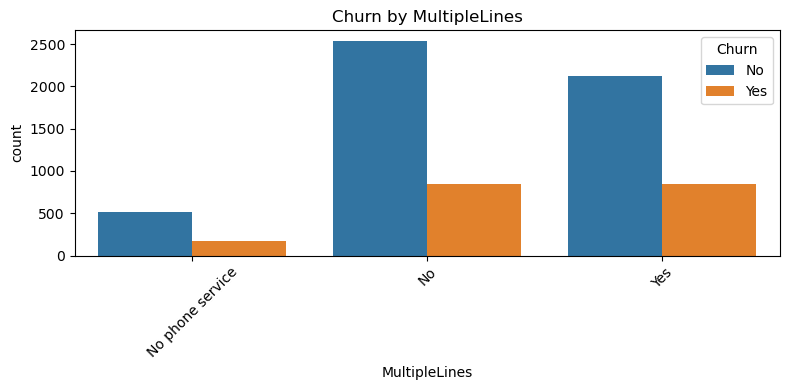

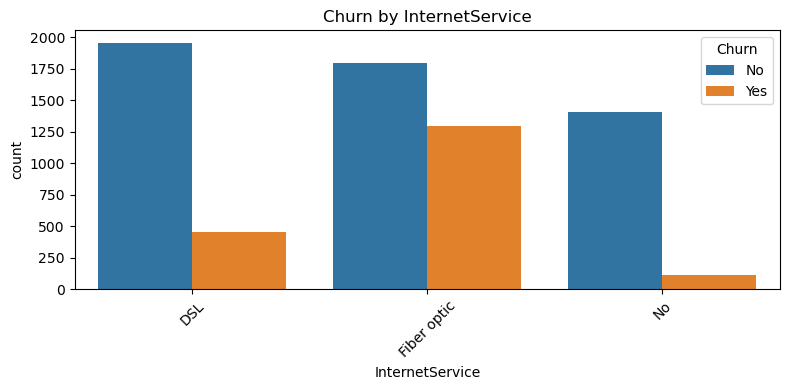

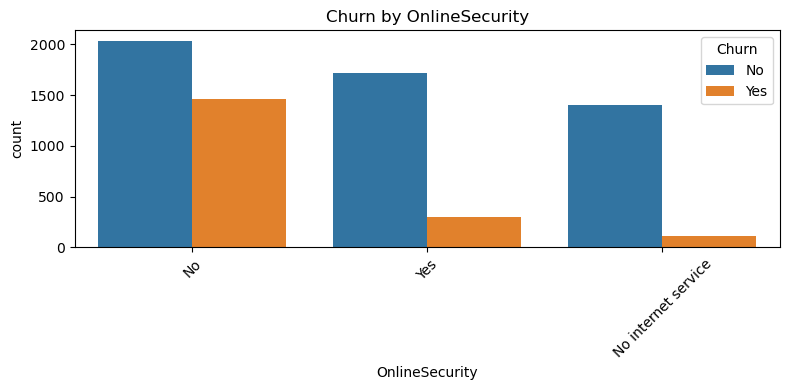

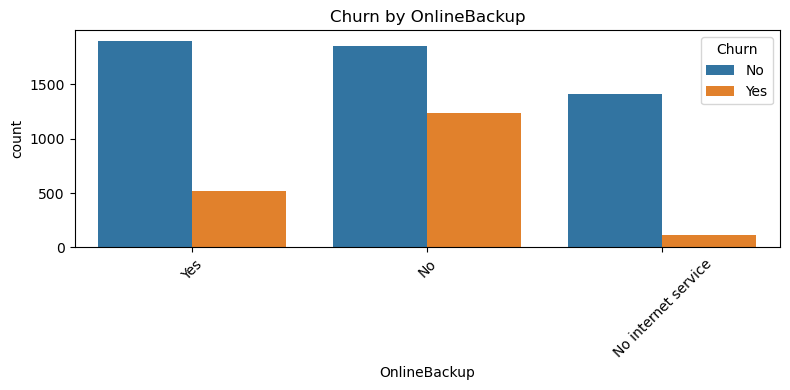

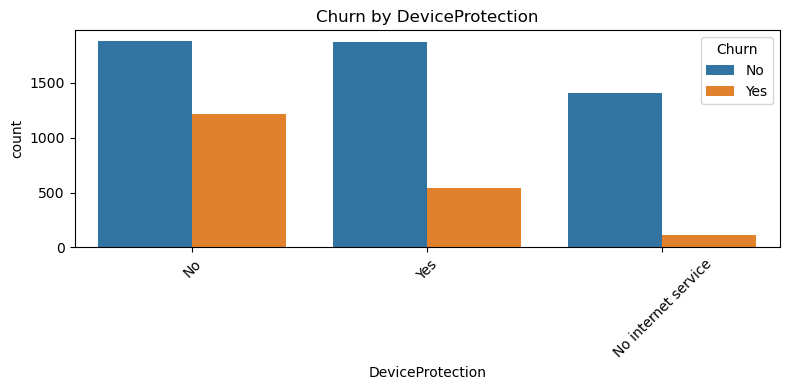

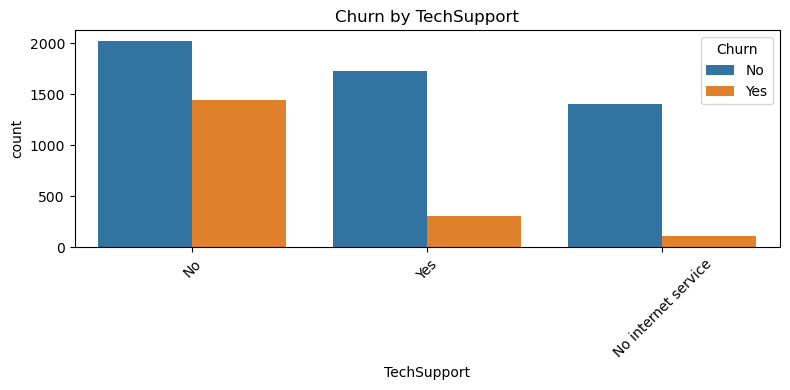

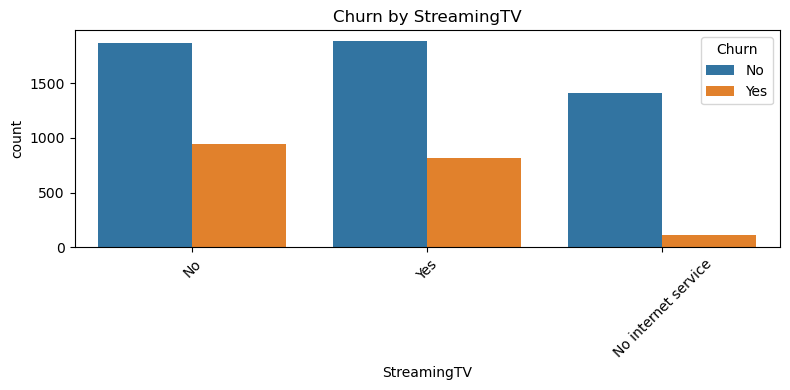

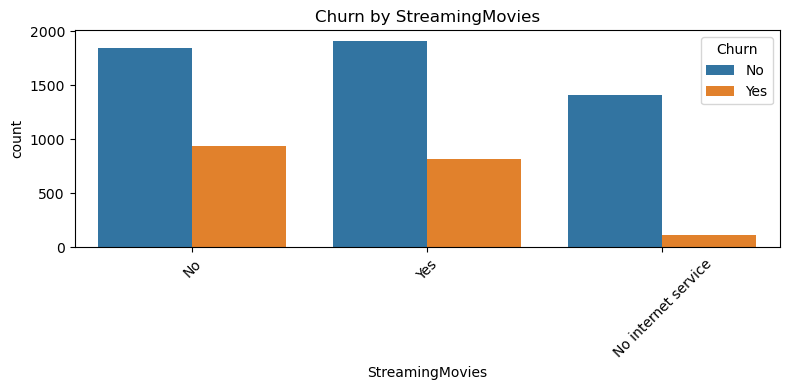

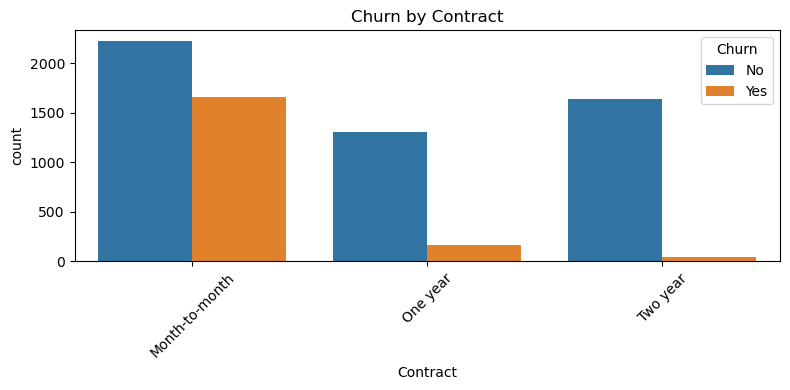

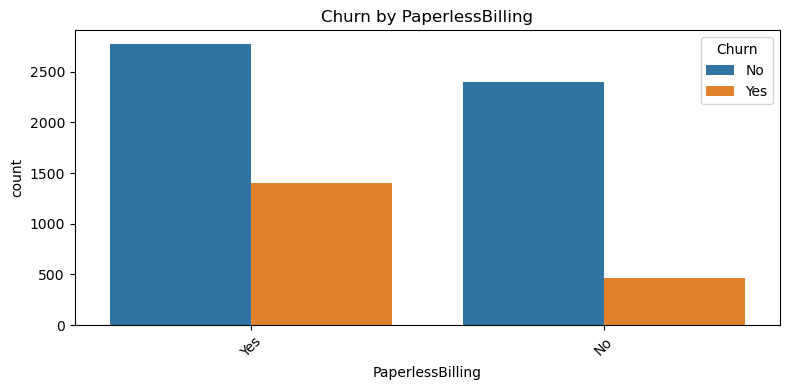

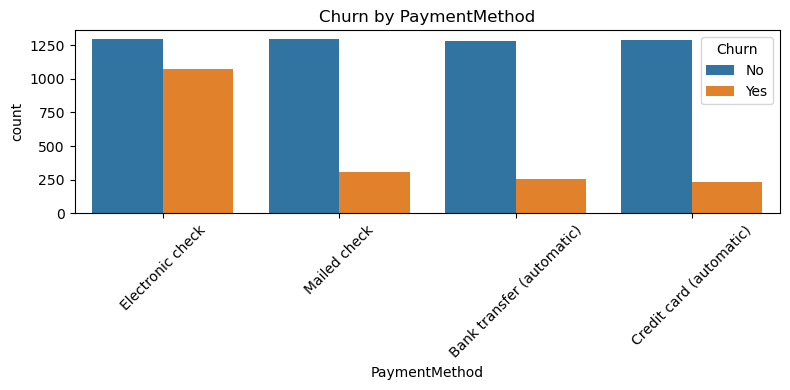

In [35]:
# Bar plots for Churn by categorical features
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
              ]

for col in cols:
    plt.figure(figsize = (8, 4))
    sns.countplot(data = df, x = col, hue = 'Churn')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

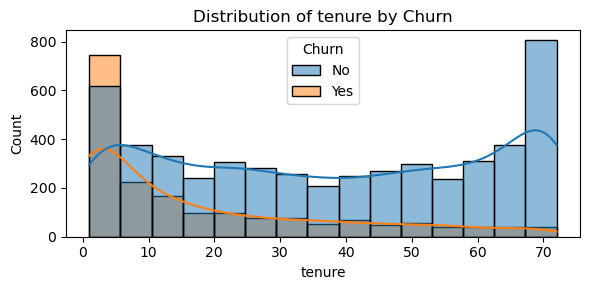

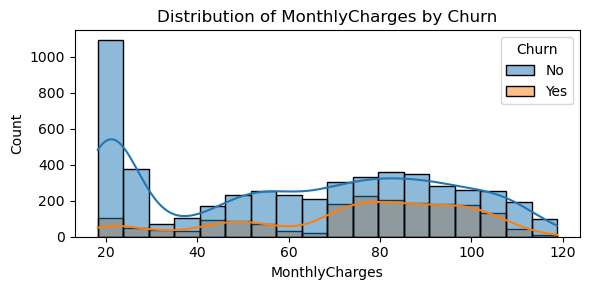

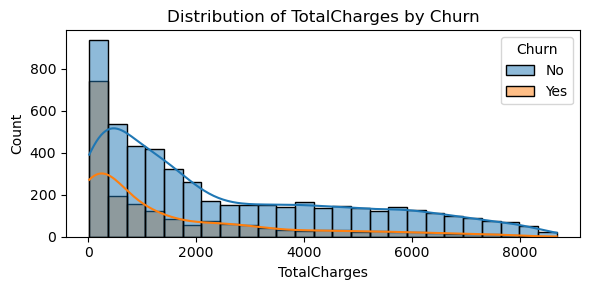

In [36]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()
    plt.show()

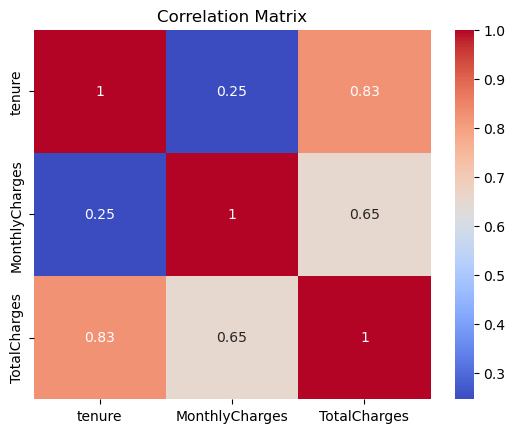

In [37]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

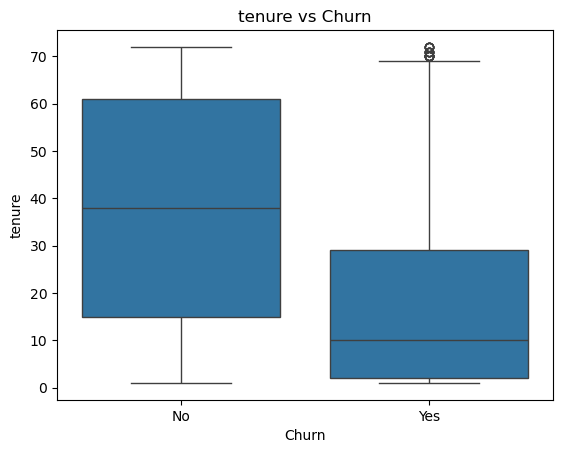

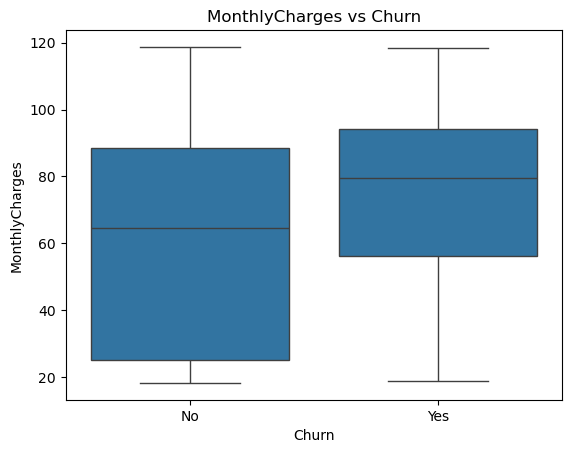

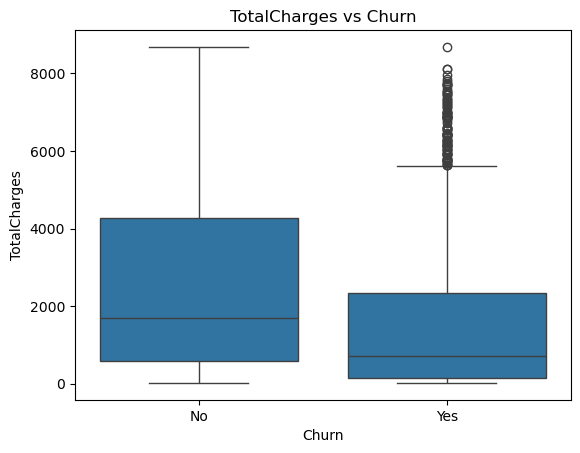

In [38]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
    plt.show()

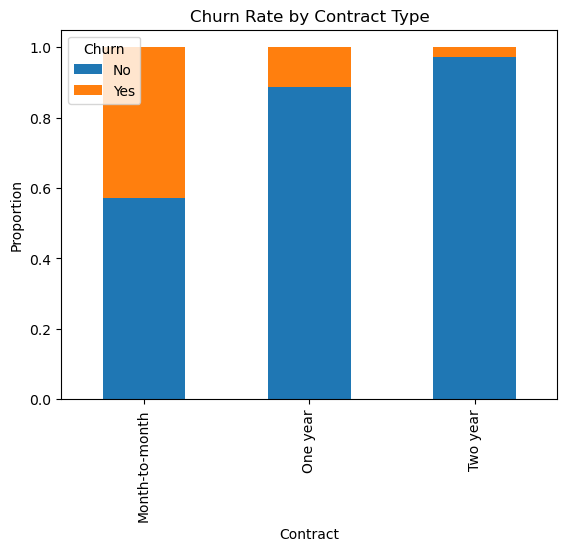

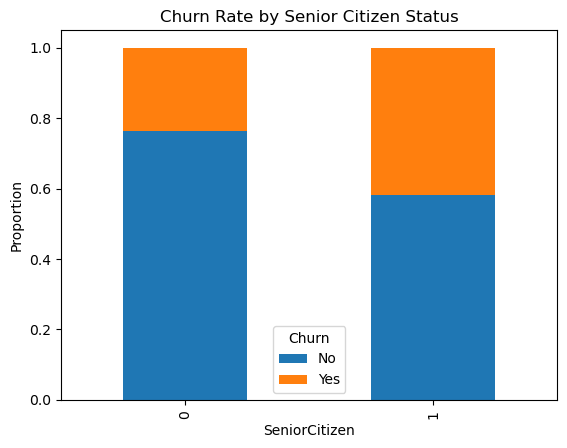

In [39]:
# Churn rate by contract type
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()

# Churn rate among senior citizens
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Churn Rate by Senior Citizen Status")
plt.ylabel("Proportion")
plt.show()

# Feature Engineering

In [41]:
object_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'Churn']

for col in object_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [42]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [43]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod']

def encode(df, cols):
    ohe = OneHotEncoder(drop = 'first', sparse_output = False)
    ohe_array = ohe.fit_transform(df[cols])
    feature_names = ohe.get_feature_names_out(cols)
    ohe_df = pd.DataFrame(ohe_array, columns = feature_names, index = df.index)

    df = df.drop(cols, axis = 'columns')
    df = pd.concat([df, ohe_df], axis = 'columns')

    return df

In [44]:
df = encode(df, cols_to_encode)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingMovies,PaperlessBilling,MonthlyCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No,1,29.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,No,0,56.95,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,No,1,53.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,No,0,42.30,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,No,1,70.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df = df.drop('customerID', axis = 'columns')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,No,1,29.85,29.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,No,0,56.95,1889.50,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,No,1,53.85,108.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,No,0,42.30,1840.75,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,No,1,70.70,151.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
df = encode(df, ['StreamingMovies'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Selection

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
X = df.drop('Churn', axis = 'columns')
y = df.Churn

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [50]:
model_params = {
    'gradient_boosting': {
        'model': GradientBoostingClassifier(random_state=30),
        'params': {
            'n_estimators': [50, 200],
            'max_depth': [10],
            'learning_rate': [0.01, 0.1]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=30),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=30, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2, 10]
        }
    }
}

In [51]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })

C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [52]:
scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,best_params
0,gradient_boosting,0.786268,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
1,logistic_regression,0.753963,{'C': 1}
2,random_forest,0.797643,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."


# Logistic Regression

In [53]:
df1 = df.copy()

In [54]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
# Create Pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter = 1000, C = 1))
     ])

# Fit model
pipeline.fit(X_train, y_train)

# Make prediction
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8071090047393364
Confusion Matrix:
 [[1384  165]
 [ 242  319]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



# Random Forest

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',  # or use 'f1'/'roc_auc' depending on your goal
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best score:", random_search.best_score_)
print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.8069896000990466
Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'class_weight': None}


In [63]:
# Evaluate on test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7909952606635071
Confusion Matrix:
 [[1401  148]
 [ 293  268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



# Gradient Boosting

In [64]:
# Parameter distribution to sample from
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],  # fraction of samples used for fitting trees (boosting)
    'max_features': ['sqrt', 'log2', None]  
}

gb = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,               # number of random parameter combinations to try
    scoring='accuracy',     
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best score:", random_search.best_score_)
print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.8088174239610415
Best params: {'subsample': 0.6, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.01}


In [65]:
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7943127962085308
Confusion Matrix:
 [[1395  154]
 [ 280  281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110



# XGBClassifier

In [66]:
from xgboost import XGBClassifier

# Parameter grid to sample from
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],  # Minimum loss reduction to make a split
    'reg_alpha': [0, 0.01, 0.1, 1],   # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],     # L2 regularization
    'scale_pos_weight': [1, 5, 10]    # Useful for class imbalance (ratio of negative:positive)
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',  # or 'roc_auc', 'f1', etc.
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best score:", random_search.best_score_)
print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.8098334777764021
Best params: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


C:\Users\91976\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [67]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7900473933649289
Confusion Matrix:
 [[1392  157]
 [ 286  275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



# ROC Curve

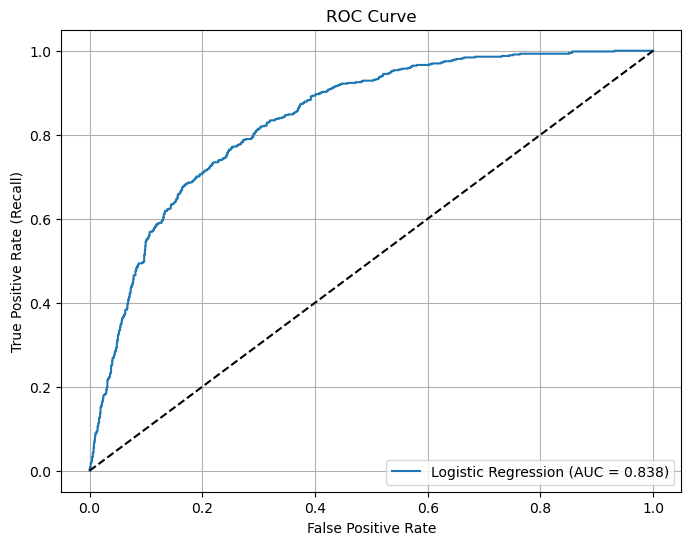

In [68]:
# Logistic Regression gave the best results
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [70]:
# Get the logistic regression model from pipeline
log_reg = pipeline.named_steps['lr']

In [71]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0],
    'Odds_Ratio': np.exp(log_reg.coef_[0])
})

# Sort by absolute value of coefficients (strongest predictors at top)
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

print(coefficients)

                                  Feature  Coefficient  Odds_Ratio
4                                  tenure    -1.453474    0.233757
7                          MonthlyCharges    -0.761563    0.466936
8                            TotalCharges     0.740914    2.097852
11            InternetService_Fiber optic     0.672710    1.959541
24                      Contract_Two year    -0.567817    0.566761
23                      Contract_One year    -0.280008    0.755777
22                        StreamingTV_Yes     0.225577    1.253045
10                      MultipleLines_Yes     0.220639    1.246873
29                    StreamingMovies_Yes     0.219688    1.245688
26         PaymentMethod_Electronic check     0.168436    1.183452
6                        PaperlessBilling     0.159581    1.173019
14                     OnlineSecurity_Yes    -0.151132    0.859734
20                        TechSupport_Yes    -0.150504    0.860275
3                              Dependents    -0.122262    0.88

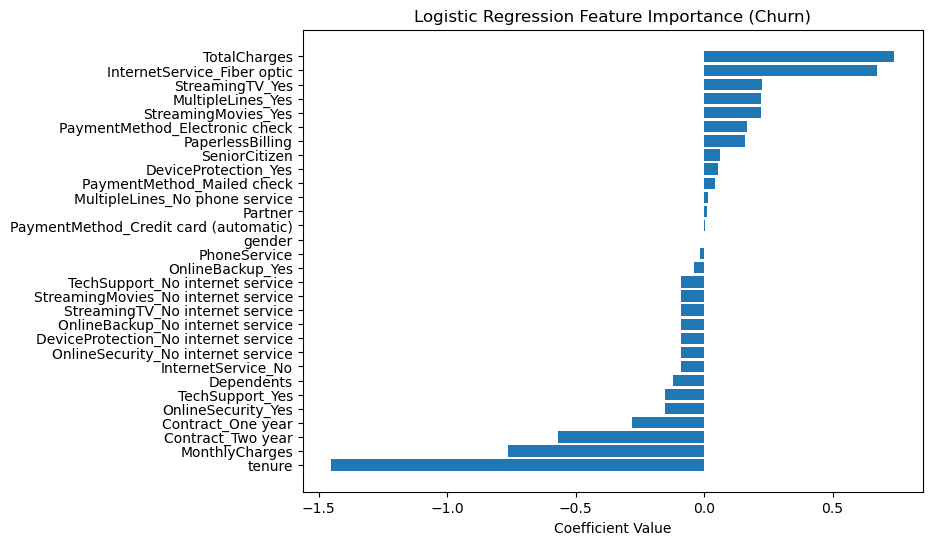

In [72]:
import matplotlib.pyplot as plt

coefficients.sort_values(by='Coefficient', inplace=True)

plt.figure(figsize=(8,6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance (Churn)")
plt.show()